In [ ]:
from google.colab import drive
drive.mount("/content/drive")
folder = "/content/drive/MyDrive/Data-clustering/"


Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#cargar datos
letters = pd.read_csv(folder + "letters.csv")
numbers = pd.read_csv(folder + "digits.csv")

In [ ]:
print(letters.shape)
print(numbers.shape)

(88799, 785)
(88000, 786)


In [ ]:
letters

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.376,0.377,0.378,0.379,0.380,0.381,0.382,0.383,0.384,0.385,0.386,0.387,0.388,0.389,0.390,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400,0.401,0.402,0.403,0.404,0.405,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88795,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88796,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
88797,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
numbers.head()

,Unnamed: 0,8,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,...,0.481,0.482,0.483,0.484,0.485,0.486,0.487,0.488,0.489,0.490,0.491,0.492,0.493,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520
0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
letters["23"]

0         7
1        16
2        15
3        23
4        17
         ..
88794     1
88795    21
88796     1
88797    23
88798    12
Name: 23, Length: 88799, dtype: int64

In [ ]:
numbers["8"]

0        9
1        6
2        3
3        6
4        6
        ..
87995    7
87996    6
87997    0
87998    9
87999    0
Name: 8, Length: 88000, dtype: int64

In [ ]:
letters["23"].max()

26

In [ ]:
numbers["8"].max()

9

In [ ]:
numbers["8"] = [i + 27 for i in numbers["8"]]

In [ ]:
numbers["8"]

0        36
1        33
2        30
3        33
4        33
         ..
87995    34
87996    33
87997    27
87998    36
87999    27
Name: 8, Length: 88000, dtype: int64

In [ ]:
target = list(letters["23"]) + list(numbers["8"])
numbers.drop(["Unnamed: 0", "8"], inplace = True, axis=1)
letters.drop("23", inplace= True, axis=1)

In [ ]:
len(target)

176799

In [ ]:
columns = ["pixel" + str(i+1) for i in range (784)]
len(columns)

784

In [ ]:
letters.columns = columns
numbers.columns = columns


In [ ]:
data = pd.concat([letters, numbers], ignore_index=True)
data.shape

(176799, 784)

255
0


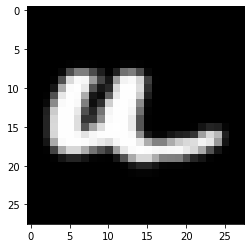

In [ ]:
ind = 153
image = data.iloc[ind].to_numpy()
print(image.max())
print(image.min())
pixels = image.reshape((28, 28))
imagen = np.fliplr (pixels)
imagen = np.rot90(imagen)
plt.imshow(imagen, cmap = "gray")
plt.show()

Entrenamiento k-means

In [ ]:
x = data.to_numpy()
y = pd.Series(target).to_numpy()
del data, letters, numbers

In [ ]:
x = x / 255

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=42)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score
kmeans = KMeans(n_clusters = 36, random_state = 0).fit(x_train)
print(completeness_score(kmeans.predict(x_test), y_test))

0.44092440835986624


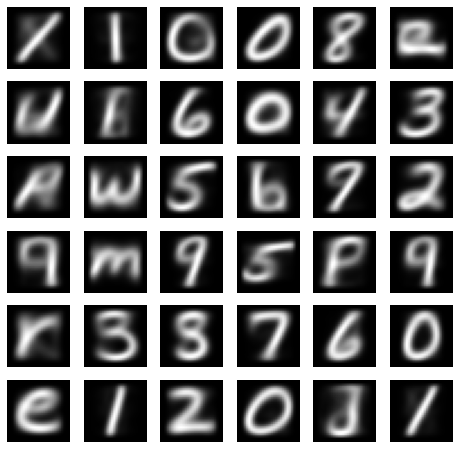

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,8)
rows = 6
col = 6
for i in range (36):
  plt.subplot(rows, col, i+1)
  cluster = kmeans.cluster_centers_[i]
  pixels = cluster.reshape ((28,28))
  imagen = np.fliplr(pixels)
  imagen = np.rot90(imagen)
  plt.axis("off")
  plt.imshow(imagen, cmap= "gray")

Método de Silhouette

In [ ]:
from sklearn.clustser import KMeans

ModuleNotFoundError: ignored

In [ ]:
!pip install -U yellowbrick

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
codo = KElbowVisualizer(KMeans(random_state=0), metric="silhouette", k=(34,38))
codo.fit(x_train)
codo.poof()

In [ ]:
model = KMeans(36, random_state=0)
graf_sil= SilhouetteVisualizer(model)
graf_sil.fit(x_train)
graf_sil.poof()